# How to reduce overfitting?

2 techniquies:
1. Image Augmentation
2. Dropout

Let's start with a model that is very effectuve at learning cats vs dogs.
It's similar to the previous models that you have used, but I have updated the layers. Note that there are now 4 convolutional layers:
- 32, 64, 128 and 128 convolutions respectively.

Also we will train for 100 epochs, because we need to plot a graph of loss and *accuracy*

In [1]:
# Downloafing the dataset
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
 -O /tmp/cats_and_dogs_filtered.zip


import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# directory paths
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# defining the model architecture
model = tf.keras.models.Sequential([
    # 4 convolution-maxpool pairs, 1 flatten , 2 dense
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

# Data generator, rescaling all images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Because epochs are 100
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

# Flow testing images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,   # 2000 images = batch_size * steps
    epochs=100,
    validation_data=test_generator,
    validation_steps=50,   # 1000 images = batch_size * steps
    verbose=2
)

--2023-09-26 09:32:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.2MB/s    in 3.9s    

2023-09-26 09:32:32 (16.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 18s - loss: 0.7068 - accuracy: 0.5140 - val_loss: 0.6917 - val_accuracy: 0.5910 - 18s/epoch - 175ms/step
Epoch 2/100
100/100 - 4s - loss: 0.6936 - accuracy: 0.5215 - val_loss: 0.6706 - val_accuracy: 0.6370 - 4s/epoch - 45ms/step
Epoch 3/100
100/100 - 5s - loss: 0.6725 - accuracy: 0.6070 - val_loss: 0.6173 - val_accuracy: 0.6830 - 5s/epoch - 51ms/step
Epoch 4/100
100/100 - 9s - loss: 0.6290 - accuracy: 0.6490 - val_loss: 0.5737 - val_accuracy: 0.7000 - 9s/epoch - 85ms/step
Epoch 5/100
100/100 - 8s - loss: 0.5784 - accuracy: 0.7090 - val_loss: 0.5995 - val_accuracy: 0.6770 - 8s/epoch - 78ms/step
Epoch 6/100
100/100 - 6s - loss: 0.5444 - accuracy: 0.7290 - val_loss: 0.5522 - val_accuracy: 0.7180 - 6s/epoch - 61ms/step
Epoch 7/100
100/100 - 7s - loss: 0.5244 - accuracy: 0.7415 - val_loss: 0.5786 - val_accuracy: 0.7190 - 7s/epoch - 70ms/step
Epoch 8/100
100/100 - 5s - loss: 0.4604 - acc

<Figure size 640x480 with 0 Axes>

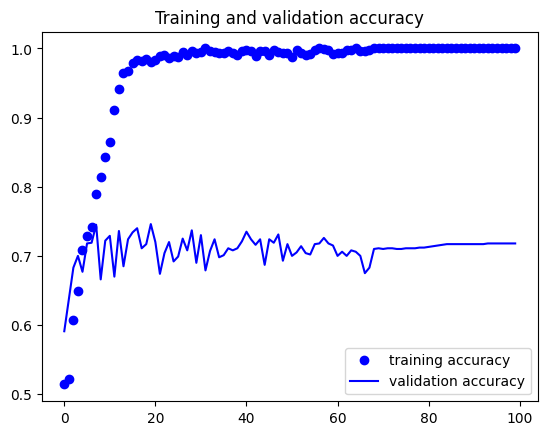

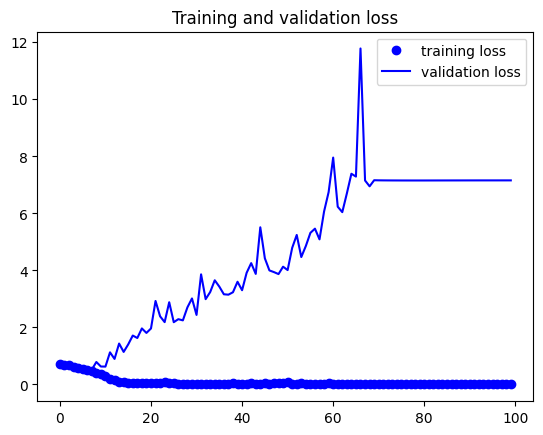

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plotting accuracy
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# plotting loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

The training accuracy is 100% but the vaidation accuracy is in 70-80% range. This is an example of overfitting which measn that the model can do very well with the images it has seen before, but not so well with the images it hasn't seen.

How to avou-id overfitting?
- One simple method is to augment (change) the images a bit.

Think about it, most pictures of cats (for example), are very similar. The ears are at the top then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if we tweak the images to change this a bit, rotate the image, squash it. That is what image augmentation is all about. **And there is an API that makes it easy.**

Take a look at the ImageGenerator. There are properties on it that you can use to augment the image.

```
# Updated for image augmentation
train_datagen = ImageDatGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_Range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)
```

There are more options available (for that, see the keras documentation). Let us describe what we just wrote:
- To randomly rotate pictures within a range: rotation_range is a value in degrees (0-180)
- To randomply translate pictures verticaly or horizontally within a range: width_shift and height_shift are ranges as a fraction of total width or height.
- zoom_range is for randomly zooming inside pictures.
- shear_range is for randomply aplying shearing transformations.
- horizontal_flip is for randomly flipping half of the images horizontally. This is relevant where there are no assumptions of horizontal assymetry (eg. real-world pictures).
- fill mode is the strategy used for filling in neawly created pixels, which can appear after a rotation or a width/height shift.


Lets add some extra code for image augmentation:



## Adding Image Augmentation

In [4]:
# Downloafing the dataset
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
 -O /tmp/cats_and_dogs_filtered.zip


import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# directory paths
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# defining the model architecture
model = tf.keras.models.Sequential([
    # 4 convolution-maxpool pairs, 1 flatten , 2 dense
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

# Data generator, updated for image augmentation
# now instead of just rescaling all images by 1./255, we also
# rotate, translate, shear, zoom, flip and fill.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No need to do this on test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Because epochs are 100
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

# Flow testing images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,   # 2000 images = batch_size * steps
    epochs=100,
    validation_data=test_generator,
    validation_steps=50,   # 1000 images = batch_size * steps
    verbose=2
)

--2023-09-26 10:01:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  19.4MB/s    in 4.1s    

2023-09-26 10:01:58 (16.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 17s - loss: 0.7190 - accuracy: 0.4930 - val_loss: 0.6925 - val_accuracy: 0.5500 - 17s/epoch - 171ms/step
Epoch 2/100
100/100 - 14s - loss: 0.6935 - accuracy: 0.5035 - val_loss: 0.7476 - val_accuracy: 0.5000 - 14s/epoch - 145ms/step
Epoch 3/100
100/100 - 16s - loss: 0.6944 - accuracy: 0.5080 - val_loss: 0.6891 - val_accuracy: 0.5630 - 16s/epoch - 157ms/step
Epoch 4/100
100/100 - 15s - loss: 0.6909 - accuracy: 0.5165 - val_loss: 0.6710 - val_accuracy: 0.5310 - 15s/epoch - 152ms/step
Epoch 5/100
100/100 - 15s - loss: 0.6765 - accuracy: 0.5805 - val_loss: 0.6568 - val_accuracy: 0.5560 - 15s/epoch - 149ms/step
Epoch 6/100
100/100 - 15s - loss: 0.6656 - accuracy: 0.5815 - val_loss: 0.6322 - val_accuracy: 0.6490 - 15s/epoch - 153ms/step
Epoch 7/100
100/100 - 19s - loss: 0.6711 - accuracy: 0.5985 - val_loss: 0.6251 - val_accuracy: 0.6440 - 19s/epoch - 189ms/step
Epoch 8/100
100/100 - 15s -

<Figure size 640x480 with 0 Axes>

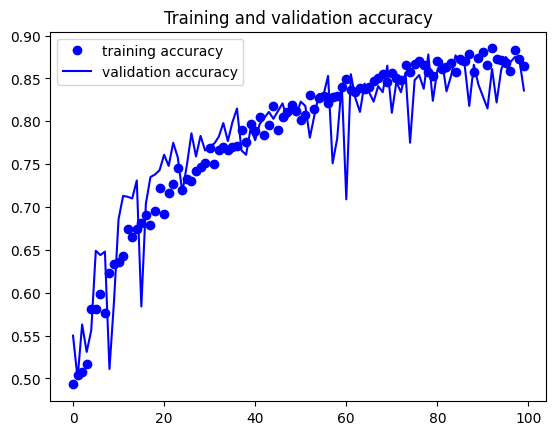

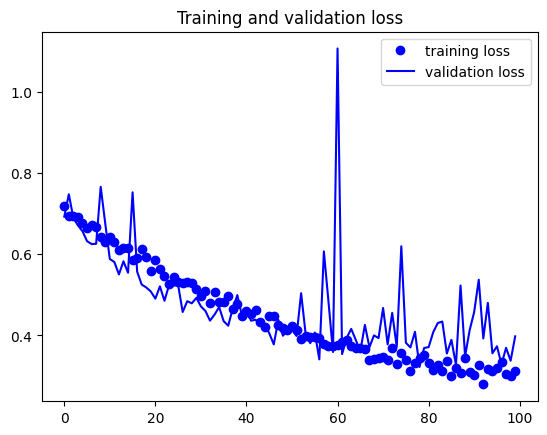

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plotting accuracy
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# plotting loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

## Adding dropout layer

To prevent proximity bias. \
That is the neurons which are close to each other can be trained very similar values. You can dropout a bunch of them to get rid of that.

In [ ]:
# Downloafing the dataset
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
 -O /tmp/cats_and_dogs_filtered.zip


import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# directory paths
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# defining the model architecture
model = tf.keras.models.Sequential([
    # 4 convolution-maxpool pairs, 1 flatten , 2 dense
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

# Data generator, updated for image augmentation
# now instead of just rescaling all images by 1./255, we also
# rotate, translate, shear, zoom, flip and fill.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No need to do this on test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Because epochs are 100
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

# Flow testing images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,   # 2000 images = batch_size * steps
    epochs=100,
    validation_data=test_generator,
    validation_steps=50,   # 1000 images = batch_size * steps
    verbose=2
)

--2023-09-26 10:29:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  19.9MB/s    in 4.0s    

2023-09-26 10:30:04 (16.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 17s - loss: 0.6965 - accuracy: 0.4850 - val_loss: 0.6912 - val_accuracy: 0.5000 - 17s/epoch - 175ms/step
Epoch 2/100
100/100 - 15s - loss: 0.6877 - accuracy: 0.5500 - val_loss: 0.6573 - val_accuracy: 0.6320 - 15s/epoch - 149ms/step
Epoch 3/100
100/100 - 16s - loss: 0.6723 - accuracy: 0.5615 - val_loss: 0.6333 - val_accuracy: 0.6180 - 16s/epoch - 160ms/step
Epoch 4/100
100/100 - 15s - loss: 0.6575 - accuracy: 0.5800 - val_loss: 0.6232 - val_accuracy: 0.6460 - 15s/epoch - 148ms/step
Epoch 5/100
100/100 - 15s - loss: 0.6514 - accuracy: 0.6085 - val_loss: 0.6348 - val_accuracy: 0.6170 - 15s/epoch - 149ms/step
Epoch 6/100
100/100 - 15s - loss: 0.6372 - accuracy: 0.6285 - val_loss: 0.6042 - val_accuracy: 0.6540 - 15s/epoch - 150ms/step
Epoch 7/100
100/100 - 16s - loss: 0.6270 - accuracy: 0.6595 - val_loss: 0.6602 - val_accuracy: 0.5820 - 16s/epoch - 161ms/step
Epoch 8/100
100/100 - 15s -

<Figure size 640x480 with 0 Axes>

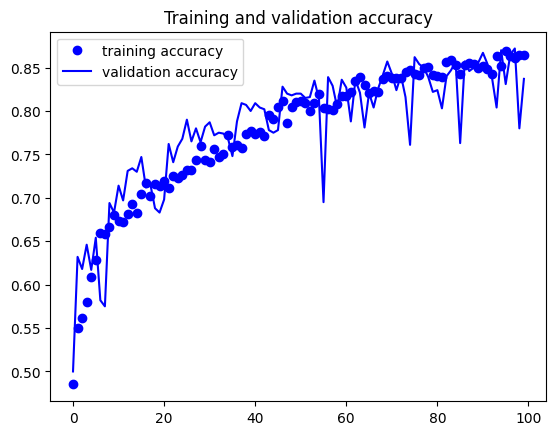

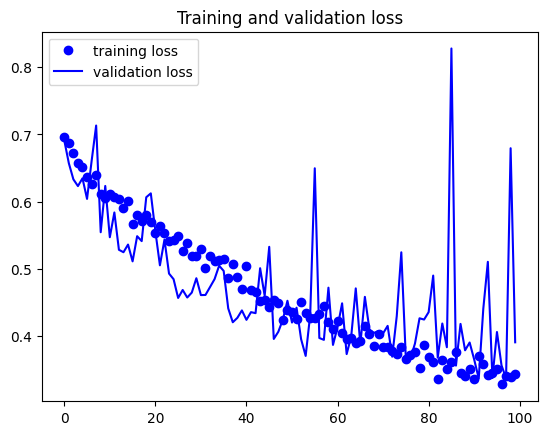

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plotting accuracy
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# plotting loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()